In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st

# Reflect Tables into SQLAlchemy ORM

In [105]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [106]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources//hawaii.sqlite")

In [107]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [108]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [109]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [111]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


In [112]:
# Starting from the most recent data point in the database, calculate the date one year from the last date in data set.
ayearagodate = (dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
print(ayearagodate)

2016-08-23


In [119]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= ayearagodate ).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ["date","prcp"])
precipitation_df.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [120]:
# Sort the dataframe by date
precipitation_df.set_index('date', inplace=True)
precipitation_df = precipitation_df.sort_values(["date"])
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


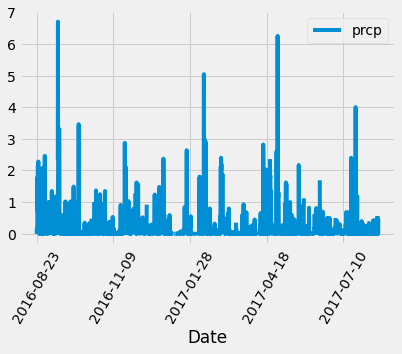

In [122]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.show()

In [123]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number stations in the dataset
count_stations = session.query(Station.id).count()
print(count_stations)

9


In [167]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostactive = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).limit(5).all()
mostactive


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612)]

In [158]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

onemostactive = mostactive[0][0]
onemostactive

lowtemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == onemostactive).scalar()
print(f'The lowest temperature of the most active station is {lowtemp}')

hightemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == onemostactive).scalar()
print(f'The highest temperature of the most active station is {hightemp}')

avgtemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == onemostactive).scalar()
print(f'The average temperature of the most active station is {avgtemp}')


The lowest temperature of the most active station is 54.0
The highest temperature of the most active station is 85.0
The average temperature of the most active station is 71.66378066378067


In [177]:
# Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram

twelve_month_station = session.query(Measurement.tobs).filter(Measurement.station == onemostactive).\
                                                        filter(Measurement.date >= ayearagodate).all()
twelve_month_station_df = pd.DataFrame(twelve_month_station, columns=["tobs"])
twelve_month_station_df



,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


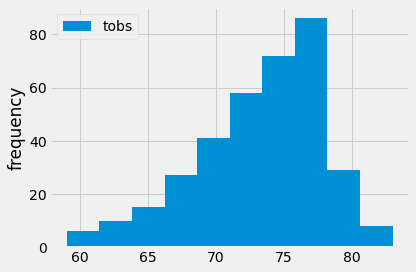

In [179]:
plt.hist(twelve_month_station_df["tobs"])
plt.ylabel("frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()